In [1]:
import pybaseball as pyb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Aging Curve

스포츠 선수들의 기량은 처음엔 경험이 쌓일수록 성장하다가, 나이가 들수록 노쇠화되어 쇠퇴하기 마련이다. 나이에 따른 성장과 쇠퇴의 곡선을 'Aging Curve'라고 부른다. 평균적으로, 선수들은 조금씩 성장하다가 나이가 30 근처일때 최고의 기량을 뽐내고, 나이가 들며 쇠퇴한다.   
    
이를 매우 간단한 2차곡선식으로 표현하면 다음과 같다.
$$
A + B(Age-30) + C{(Age-30)^2}
$$
   
A, B, C는 곡선의 형태를 잡아주는 상수로써, 선수마다 차이를 보인다. 일반적으로 C는 음수를 나타내는데, 이는 곡선이 성장하다가 감소하는 모습을 보이기 때문이다. 


이 곡선 식에 의하면, 가장 전성기의 나이(Peak Age)는 다음과 같다.

$$
PeakAge = 30 - \frac{B}{2C}
$$

위의 식들과 MLB 데이터를 가지고 선수들의 Aging Curve를 확인해보았다.
   


참조: Max Marchi, [Analyzing Baseball Data with R], (Chapman & Hall/CRC The R Series)


----

# OPS Aging Curve

야구에서 타자들의 OPS성적에 대한 Aging Curve를 확인해보았다. 메이저리그에서 1980년 이후 12년 이상을 활동한 선수들의 매시즌 OPS 수치 변화를 통해 Aging Curve를 확인하였다. 

### 1. Data

In [184]:
# 1980~2021시즌 타자들의 스탯기록 데이터
stats = pyb.batting_stats(1980, 2021)

In [225]:
stats.head()

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,Age30,Age302
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,31,2,46,117,110,198,68,47,9,2,0,4,9,2,0.370,109.0,169.0,80.0,16.0,2398.0,1336.0,1062.0,5.0,0.0,0.0,0.324,0.077,4.21,0.582,0.799,1.381,0.429,0.330,0.0064,0.223,0.304,0.472,0.095,0.272,0.046,0.0,0.544,110.0,183,110.1,4.3,18.6,-6.3,126.8,12.7,$49.5,3.9,244,10.51,-5.90,16.40,118.51,12.63,0.98,3.23,4,11.82,-1.11,0.678,89.0,0.108,79.9,NaN,NaN,0.081,74.2,0.107,76.5,0.026,80.5,NaN,NaN,0.081,NaN,67.8,12.5,NaN,5.1,19.2,0.8,NaN,4.54,5.27,NaN,2.84,8.13,1.37,NaN,0.113,0.702,0.366,0.401,0.899,0.811,0.430,0.453,0.063,-1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.9,-4.4,37 - 37,108.9,1.2,2.3,0.447,0.310,0.243,0.095,0.522,0.383,0.475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139,347,47,171,189,273,111,1.05,70.0,135.0,249.0,105.0,106.0,87.0,64.0,83.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN,7,49
2,1109,2001,Barry Bonds,SFG,36,153,476,664,156,49,32,2,73,129,137,177,35,93,9,2,0,5,13,3,0.328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267,0.140,1.90,0.515,

In [ ]:
# 곡선 계산에 필요한 값들
stats['Age30'] = stats['Age']-30
stats['Age302'] = (stats['Age']-30)**2

In [187]:
# 메이저리그에서 12년 이상 활동한 선수들
player_id = np.array(stats['IDfg'].unique())
long=[]
for i in player_id:
    if len(stats[stats['IDfg']==i])>=12:
        long.append(i)

In [246]:
# 선수 숫자
len(long)

85

1980년 이후, 메이저리그에서 12년 이상 활동한 타자는 총 85명이었다.

### 2. Example
선수들의 Aging Curve가 제대로 나타나는지 확인하기 위해 선수 3명을 예시로 확인해보았다. 

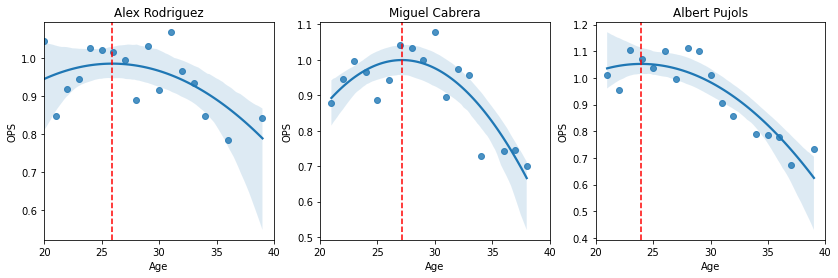

In [240]:
import statsmodels.formula.api as smf

example = ['Alex Rodriguez', 'Miguel Cabrera', 'Albert Pujols']
plt.figure(figsize=(14,4))
for i in range(len(example)):
    data=stats[stats['Name']==example[i]]
    reg = smf.ols(formula = 'OPS ~ Age30 + Age302', data=data).fit()
    peak_age = 30-reg.params[1]/(2*reg.params[2])
    
    plt.subplot(1,3,i+1)
    sns.regplot(data=data, x='Age', y='OPS', order=2)
    plt.axvline(peak_age, color='red', linestyle='--')
    plt.xlim(20,40)
    plt.title(example[i])

위의 그래프를 보면 일반적인 선수들의 Aging Curve 모습을 확인할 수 있다. 데뷔 이후 OPS 수치가 조금씩 증가하다가 일정 나이 이후 감소하는 모습을 보인다. 2차 곡선으로 이를 확인하여 Peak Age 값을 빨간 점선으로 표현하였다. Peak Age값은 보통 20대 중후반~ 30대 초반의 값을 나타내는데, 위의 Albert Pujols선수의 경우 Peak Age값이 조금 일찍 나타난 것으로 보인다. 

### 3. Distribution

메이저리그에서 12년 이상 활동한 선수들의 Peak Age값의 분포를 확인해보았다. 

In [215]:
peak_age_list=[]
rcurve=[]
for i in old_long:
    stat_info = stats[stats['IDfg']==i]
    reg = smf.ols(formula = 'OPS ~ Age30 + Age302', data=stat_info).fit()
    if reg.params[2]>0:
        rcurve.append(stat_info['Name'].iloc[0])
    else:
        peak_age = 30-reg.params[1]/(2*reg.params[2])
        peak_age_list.append(peak_age)

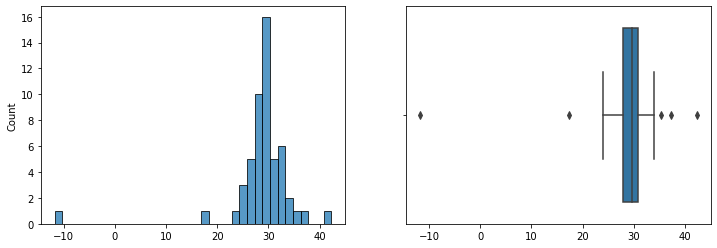

In [236]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(peak_age_list)

plt.subplot(1,2,2)
sns.boxplot(peak_age_list)

plt.show()

Histogram과 Boxplot으로 Peak Age값의 분포도를 확인하였다. 예상대로, 몇몇의 Outlier를 제외하고는 Peak Age가 20대 중후반~30대 초반에 다수 몰려있었다.   
    


### 4. 예외

일반적인 성장과 쇠퇴 형태의 2차 곡선을 띄지 않는 선수들도 있었다. Aging Curve 2차곡선식의 상수 C값이 양수가 나오는 선수들이 있었는데, 이 6명 선수의 데이터를 따로 확인해보았다.

In [216]:
# 일반적인 Aging Curve를 따르지 않은 선수들
rcurve

['Barry Bonds',
 'Evan Longoria',
 'David Ortiz',
 'Nick Markakis',
 'Fred McGriff',
 'Marquis Grissom']

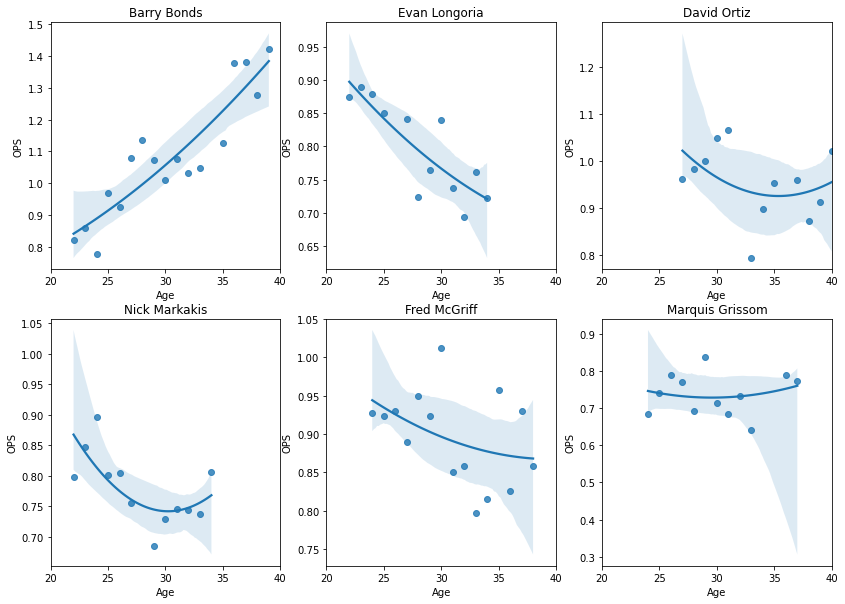

In [245]:
plt.figure(figsize=(14,10))
for i in range(len(rcurve)):
    data=stats[stats['Name']==rcurve[i]]
    reg = smf.ols(formula = 'OPS ~ Age30 + Age302', data=data).fit()
    peak_age = 30-reg.params[1]/(2*reg.params[2])
    
    plt.subplot(2,3,i+1)
    sns.regplot(data=data, x='Age', y='OPS', order=2)
    plt.xlim(20,40)
    plt.title(rcurve[i])

위의 선수들은 상수 C의 값이 양수가 나온 6명의 선수들이다.   
    
'Evan Longoria', 'Fred McGriff' 선수의 경우 성장기가 없이, 데뷔 이후 OPS 수치가 계속해서 감소만 하는 모습을 보여주었다.
    
'Marquis Grissom' 선수의 경우는 커리어 내내 큰 성장이나 감소없이 일정한 수준의 기량을 꾸준히 보여주었다.   
    
'Barry Bonds', 'David Ortiz', 'Nick Markakis' 선수들은, 커리어 후반기에 성적이 향상되는 모습을 보여주었다. 'David Ortiz', 'Nick Markakis' 선수는 성적이 감소하다가 좋아지는 모습을 보여주었고, 'Barry Bonds' 선수는 커리어 시작부터 끝까지 계속해서 성적이 좋아지는 모습을 보여주었다.